# Programming Assignment 1
* CSCI-4930/5930 ML Spring 2019  (Be sure to discard which section you are not enrolled)
* Author: Ashis Biswas (Replace my name with yours)

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [1]:
#Have included all the necessary header files needed for this programming assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### TASK 2: Load the dataset into memory so that you can play with it here

In [2]:
#Have loaded the dateset into the memory which was downloaded from canvas Machine Learning 
Atrain1 = pd.read_csv("C:/Users/gurun/Desktop/ML1/baby-weights-dataset2.csv")
Atrain2 = pd.read_csv("C:/Users/gurun/Desktop/ML1/judge-without-labels.csv")




### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [3]:
#Computing the mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset of BWEIGHT target variable 
print("BWEIGHT Variable")
Mean = Atrain1['BWEIGHT'].mean()
print("Mean:",Mean)
STDEV = np.std(Atrain1['BWEIGHT'])
print("stdev ",STDEV)
Min = Atrain1['BWEIGHT'].min()
print("Min:",Min)
Max = Atrain1['BWEIGHT'].max()
print("Max:",Max)
Percetile25 = np.percentile(Atrain1['BWEIGHT'], 25)
print("25% percentile: ",Percetile25)
Percetile50 = np.percentile(Atrain1['BWEIGHT'], 50)
print("Median:",Percetile50)
Percetile75 = np.percentile(Atrain1['BWEIGHT'], 75)
print("75% Percentile: ",Percetile75)



BWEIGHT Variable
Mean: 7.2580658284023665
stdev  1.3294541253577947
Min: 0.1875
Max: 13.0625
25% percentile:  6.625
Median: 7.375
75% Percentile:  8.0625


### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


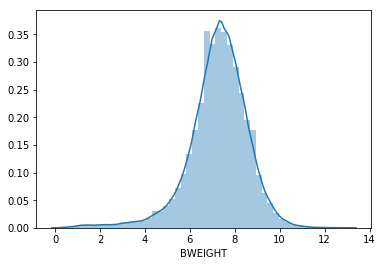

In [4]:
#Using the Seaborn function to plot the histogram of the BWEIGHT variable
sns.distplot(Atrain1['BWEIGHT'])




### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

In [5]:
#Computing the Skewness and the Kurtosis of the BWEIGHT target variable
print("Skewness: %f" % Atrain1['BWEIGHT'].skew())
print("Kurtosis: %f" % Atrain1['BWEIGHT'].kurt())


Skewness: -0.936593
Kurtosis: 2.868780


### TASK 6: Do variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

In [6]:
#FINDING THE CATEGORICAL VALUES
quantitative = [f for f in Atrain1.columns if Atrain1.dtypes[f] != 'object']
quantitative.remove('BWEIGHT')
quantitative.remove('ID')
qualitative = [f for f in Atrain1.columns if Atrain1.dtypes[f] == 'object']



In [7]:
#REPLACING THE MISSING QUALITATIVE VARIABLES AS MISSING
for c in qualitative:
    Atrain1[c] = Atrain1[c].astype('category')
    if Atrain1[c].isnull().any():
        Atrain1[c] = Atrain1[c].cat.add_categories(['MISSING'])
        Atrain1[c] = Atrain1[c].fillna('MISSING')
        


In [8]:
#ENCODING THE QUALITATIVE VARIABLES AS HISPMOM_E and HISPDAD_E

def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'BWEIGHT']].groupby(feature).mean()['BWEIGHT']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
qual_encoded = []
for q in qualitative:  
    encode(Atrain1, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)
type(qualitative)

['HISPMOM_E', 'HISPDAD_E']


list

 TASK 7: CHECK FOR MISSING DATA, AND APPLY A "GOOD" STRATEGY TO TACKLE IT

In [9]:
Feature = quantitative + qual_encoded
Upd_Dset = Atrain1[Feature]


from sklearn.preprocessing import OneHotEncoder

RaceMomEncod = OneHotEncoder()
RaceDadEncod = OneHotEncoder()
HispMomEncod = OneHotEncoder()
HispDadEncod = OneHotEncoder()
RaceMomColumn = RaceMomEncod.fit_transform(Upd_Dset.RACEMOM.values.reshape(-1,1)).toarray()
RaceDadColumn = RaceDadEncod.fit_transform(Upd_Dset.RACEDAD.values.reshape(-1,1)).toarray()
HispMomColumn = HispMomEncod.fit_transform(Upd_Dset.HISPMOM_E.values.reshape(-1,1)).toarray()
HispDadColumn = HispDadEncod.fit_transform(Upd_Dset.HISPDAD_E.values.reshape(-1,1)).toarray()

RaceMom = pd.DataFrame(RaceMomColumn, columns = ["RaceMom_"+str(int(i)) for i in range(RaceMomColumn.shape[1])])
Upd_Dset = pd.concat([Upd_Dset, RaceMom], axis=1)
Atrain1 = pd.concat([Atrain1, RaceMom], axis=1)
RaceMomList = RaceMom.columns.tolist()
RaceDad = pd.DataFrame(RaceDadColumn, columns = ["RaceDad_"+str(int(i)) for i in range(RaceDadColumn.shape[1])])
Upd_Dset = pd.concat([Upd_Dset, RaceDad], axis=1)
Atrain1 = pd.concat([Atrain1, RaceDad], axis=1)
RaceDadList = RaceDad.columns.tolist()


HispMom = pd.DataFrame(HispMomColumn, columns = ["HispMom_"+str(int(i)) for i in range(HispMomColumn.shape[1])])
Upd_Dset = pd.concat([Upd_Dset, HispMom], axis=1)
Atrain1 = pd.concat([Atrain1, HispMom], axis=1)
HispMomList = HispMom.columns.tolist()
HispDad = pd.DataFrame(HispDadColumn, columns = ["HispDad_"+str(int(i)) for i in range(HispDadColumn.shape[1])])
Upd_Dset = pd.concat([Upd_Dset, HispDad], axis=1)
Atrain1 = pd.concat([Atrain1, HispDad], axis=1)
HispDadList = HispDad.columns.tolist()


NewQual = RaceMomList + RaceDadList + HispMomList + HispDadList
NewQual



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

['RaceMom_0',
 'RaceMom_1',
 'RaceMom_2',
 'RaceMom_3',
 'RaceMom_4',
 'RaceMom_5',
 'RaceMom_6',
 'RaceMom_7',
 'RaceMom_8',
 'RaceDad_0',
 'RaceDad_1',
 'RaceDad_2',
 'RaceDad_3',
 'RaceDad_4',
 'RaceDad_5',
 'RaceDad_6',
 'RaceDad_7',
 'RaceDad_8',
 'RaceDad_9',
 'HispMom_0',
 'HispMom_1',
 'HispMom_2',
 'HispMom_3',
 'HispMom_4',
 'HispMom_5',
 'HispMom_6',
 'HispDad_0',
 'HispDad_1',
 'HispDad_2',
 'HispDad_3',
 'HispDad_4',
 'HispDad_5',
 'HispDad_6']

In [10]:
del Atrain1["RACEMOM"]
del Atrain1["RACEDAD"]
del Atrain1["HISPMOM"]
del Atrain1["HISPDAD"]
quantitative.remove("RACEMOM")
quantitative.remove("RACEDAD")

In [11]:
#This step is followed by Spearman's rank correlation

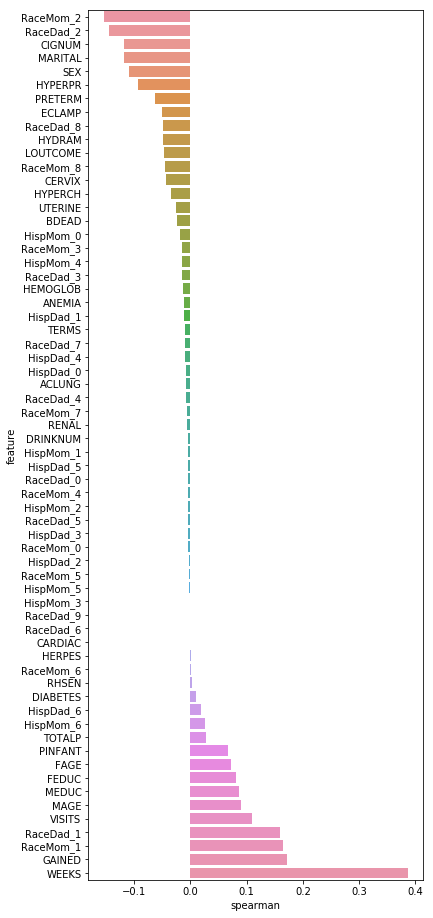

In [12]:
def spearman(frame, Feature):
    spr = pd.DataFrame()
    spr['feature'] = Feature
    spr['spearman'] = [frame[f].corr(frame['BWEIGHT'], 'spearman') for f in Feature]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(Feature)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    return 
Feature = quantitative + NewQual
spearman(Atrain1, Feature)

In [13]:
Corelated_Feature = ["WEEKS","GAINED","RaceMom_1","RaceDad_1","VISITS","MAGE"]
Upd_Dset = Upd_Dset[Corelated_Feature]

In [14]:
#This is followed by the step Missing Data

In [15]:
total = Upd_Dset.isnull().sum().sort_values(ascending=False)
percent = (Upd_Dset.isnull().sum()/Upd_Dset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MAGE,0,0.0
VISITS,0,0.0
RaceDad_1,0,0.0
RaceMom_1,0,0.0
GAINED,0,0.0
WEEKS,0,0.0


### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [16]:
#THIS STEP IS PERFORMED IN THE TASK NUMBER 6, AS MENTIONED IN THE ANNOUNCEMENT SECTION IN CANVAS

### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [17]:
#This section performs splitting of the dataset into training and testing with 80% and 20% respectively
from sklearn.model_selection import train_test_split
ATrain, ATest = train_test_split(Upd_Dset, test_size=0.2, random_state=12345)
BTrain, BTest = train_test_split(Atrain1[["BWEIGHT"]], test_size=0.2, random_state=12345)
ATrain.shape

(81120, 6)

### TASK 9.2: On the training dataset, apply a normalization technique

In [18]:
stdscaler = StandardScaler()
ATrain_X = stdscaler.fit_transform(ATrain)
print(ATrain_X)

[[ 0.10582437 -0.6065972   0.54184335  0.57364927  3.09653639  1.89333778]
 [ 0.90245325 -0.38646079  0.54184335  0.57364927 -0.65010304  0.54925152]
 [ 0.10582437 -0.09294558  0.54184335  0.57364927 -0.11486883  0.04521917]
 ...
 [ 1.69908213 -0.01956678  0.54184335  0.57364927  2.02606798 -0.29080239]
 [ 0.10582437 -0.38646079  0.54184335  0.57364927 -0.11486883 -0.79483474]
 [-1.48743339  0.86097886  0.54184335  0.57364927 -0.11486883  1.725327  ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [19]:
stdscaler = StandardScaler()
ATest_X = stdscaler.fit_transform(ATest)
ATest_X.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(20280, 6)

### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [20]:
ATrain_X = np.c_[np.ones(ATrain_X.shape[0]), ATrain_X]

In [21]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(15) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]


In [22]:
print(theta)

[[7.25755901]
 [0.72804958]
 [0.15497727]
 [0.09682795]
 [0.04686019]
 [0.03710909]
 [0.12257981]]


### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [23]:
ATest_X = np.c_[np.ones(ATest_X.shape[0]), ATest_X] 
Bpredict = np.dot(ATest_X, theta)
print(Bpredict)

[[7.33271723]
 [7.15834595]
 [7.41667537]
 ...
 [8.7796177 ]
 [7.17341219]
 [7.73252332]]


In [24]:
Bpredict.size

20280

In [25]:
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict))

BWEIGHT    1.066824
dtype: float64


In [26]:
Weight1 = error(BTest, Bpredict)

### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


In [27]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(29) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]
#Results are printed here
print("Gradient Descent 2:", theta[0], theta[1])
Bpredict2 = np.dot(ATest_X, theta)
print(Bpredict2)
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict2))
Weight2 = error(BTest, Bpredict2)

Gradient Descent 2: [7.25755901] [0.72803317]
[[7.33249279]
 [7.15807764]
 [7.41683635]
 ...
 [8.77936633]
 [7.17349484]
 [7.73265588]]
BWEIGHT    1.066857
dtype: float64


In [28]:
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(4) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]
#Results are printed here
print("Gradient Descent 3:", theta[0], theta[1])
Bpredict3 = np.dot(ATest_X, theta)
print(Bpredict3)
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict3))
Weight3 = error(BTest, Bpredict3)

Gradient Descent 3: [7.25755902] [0.7280529]
[[7.3327617 ]
 [7.15839908]
 [7.41664359]
 ...
 [8.77966755]
 [7.17339583]
 [7.73249744]]
BWEIGHT    1.066818
dtype: float64


In [29]:
alpha = 0.04 #Step size
iterations = 4000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(3) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]
#Results are printed here
print("Gradient Descent 4:", theta[0], theta[1])
Bpredict4 = np.dot(ATest_X, theta)
print(Bpredict4)
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict4))
Weight4 = error(BTest, Bpredict4)

Gradient Descent 4: [7.25755902] [0.72805277]
[[7.33275995]
 [7.15839698]
 [7.41664485]
 ...
 [8.77966558]
 [7.17339647]
 [7.73249848]]
BWEIGHT    1.066818
dtype: float64


In [30]:
alpha = 0.05 #Step size
iterations = 5000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(5) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]
#Results are printed here
print("Gradient Descent 5:", theta[0], theta[1])
Bpredict5 = np.dot(ATest_X, theta)
print(Bpredict5)
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict5))
Weight5 = error(BTest, Bpredict5)

Gradient Descent 5: [7.25755902] [0.72805277]
[[7.33275995]
 [7.15839698]
 [7.41664485]
 ...
 [8.77966558]
 [7.17339647]
 [7.73249848]]
BWEIGHT    1.066818
dtype: float64


### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [31]:
AverageRMSE = (Weight1 + Weight2  + Weight3 + Weight4 + Weight5 )/ 5
print(AverageRMSE)

BWEIGHT    1.066827
dtype: float64


In [32]:
StdDev = np.std([Weight1, Weight2 , Weight3 , Weight4 , Weight5])/5
print(StdDev)

3.080177308659534e-06


In [33]:
RMSE = AverageRMSE +- StdDev
print(RMSE)

BWEIGHT    1.066824
dtype: float64


### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [34]:
TotalDatasetA = Upd_Dset
TotalDatasetB = Atrain1[["BWEIGHT"]]
TotalDatasetB.shape

(101400, 1)

In [35]:
stdscaler = StandardScaler()
XWholeTrain_N = stdscaler.fit_transform(TotalDatasetA)
XWholeTrain_N = pd.DataFrame(XWholeTrain_N)
XWholeTrain_N.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(101400, 6)

In [36]:
XWholeTrain_N = np.c_[np.ones(XWholeTrain_N.shape[0]), XWholeTrain_N]

In [37]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m =  TotalDatasetB.size#No. of data points
np.random.seed(23) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(XWholeTrain_N, TotalDatasetB, theta, iterations, alpha)
theta1 = past_thetas[-1]
#Results are printed here
print("Gradient Descent:", theta1)

Gradient Descent: [[7.25806582]
 [0.72703969]
 [0.15699981]
 [0.09097086]
 [0.05182455]
 [0.03599505]
 [0.12227135]]


### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [38]:
Atrain2 = pd.read_csv("C:/Users/gurun/Desktop/ML1/judge-without-labels.csv")

In [39]:
quantitative = [f for f in Atrain2.columns if Atrain2.dtypes[f] != 'object']
quantitative.remove('ID')
qualitative = [f for f in Atrain2.columns if Atrain2.dtypes[f] == 'object']
print(Atrain2.shape)
print(len(quantitative))
print(qualitative)

(2001, 36)
33
['HISPMOM', 'HISPDAD']


In [40]:
for c in qualitative:
    Atrain2[c] = Atrain2[c].astype('category')
    if Atrain2[c].isnull().any():
        Atrain2[c] = Atrain2[c].cat.add_categories(['MISSING'])
        Atrain2[c] = Atrain2[c].fillna('MISSING')

In [41]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
Atrain2[["HISPDAD"]] = lenc.fit_transform(Atrain2[["HISPDAD"]])
Atrain2[["HISPMOM"]] = lenc.fit_transform(Atrain2[["HISPMOM"]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
from sklearn.preprocessing import OneHotEncoder
RaceMomEncod = OneHotEncoder()
RaceDadEncod = OneHotEncoder()
HispMomEncod = OneHotEncoder()
HispDadEncod = OneHotEncoder()


RaceMomColumn = RaceMomEncod.fit_transform(Atrain2.RACEMOM.values.reshape(-1,1)).toarray()
RaceDadColumn = RaceDadEncod.fit_transform(Atrain2.RACEDAD.values.reshape(-1,1)).toarray()
HispMomColumn = HispMomEncod.fit_transform(Atrain2.HISPMOM.values.reshape(-1,1)).toarray()
HispDadColumn = HispDadEncod.fit_transform(Atrain2.HISPDAD.values.reshape(-1,1)).toarray()

RaceMom = pd.DataFrame(RaceMomColumn, columns = ["RaceMom_"+str(int(i)) for i in range(RaceMomColumn.shape[1])])
Atrain2 = pd.concat([Atrain2, RaceMom], axis=1)
RaceMomList = RaceMom.columns.tolist()
print(type(RaceMomList))
RaceDad = pd.DataFrame(RaceDadColumn, columns = ["RaceDad_"+str(int(i)) for i in range(RaceDadColumn.shape[1])])
Atrain2 = pd.concat([Atrain2, RaceDad], axis=1)
RaceDadList = RaceDad.columns.tolist()
print(type(RaceDadList))



HispMom = pd.DataFrame(HispMomColumn, columns = ["HispMom_"+str(int(i)) for i in range(HispMomColumn.shape[1])])
Atrain2 = pd.concat([Atrain2, HispMom], axis=1)
HispMomList = HispMom.columns.tolist()
print(type(HispMomList))
HispDad = pd.DataFrame(HispDadColumn, columns = ["HispDad_"+str(int(i)) for i in range(HispDadColumn.shape[1])])
Atrain2 = pd.concat([Atrain2, HispDad], axis=1)
HispDadList = HispDad.columns.tolist()
print(type(HispDadList))



NewQual = RaceMomList + RaceDadList + HispMomList + HispDadList
NewQual

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

['RaceMom_0',
 'RaceMom_1',
 'RaceMom_2',
 'RaceMom_3',
 'RaceMom_4',
 'RaceMom_5',
 'RaceMom_6',
 'RaceMom_7',
 'RaceMom_8',
 'RaceDad_0',
 'RaceDad_1',
 'RaceDad_2',
 'RaceDad_3',
 'RaceDad_4',
 'RaceDad_5',
 'RaceDad_6',
 'HispMom_0',
 'HispMom_1',
 'HispMom_2',
 'HispMom_3',
 'HispMom_4',
 'HispDad_0',
 'HispDad_1',
 'HispDad_2',
 'HispDad_3',
 'HispDad_4',
 'HispDad_5',
 'HispDad_6']

In [43]:
print(Corelated_Feature)
Upd_Dset = Atrain2
Upd_Dset = Upd_Dset[Corelated_Feature]
print(Upd_Dset)

['WEEKS', 'GAINED', 'RaceMom_1', 'RaceDad_1', 'VISITS', 'MAGE']
      WEEKS  GAINED  RaceMom_1  RaceDad_1  VISITS  MAGE
0        36      70        1.0        1.0      11    26
1        41      36        0.0        0.0      15    18
2        39      18        1.0        1.0      10    25
3        39      25        1.0        1.0      10    22
4        38      38        1.0        1.0      15    26
5        39      51        0.0        0.0       5    25
6        38      12        1.0        1.0       7    21
7        39      20        1.0        1.0      10    21
8        40      78        1.0        1.0      18    21
9        37      33        1.0        1.0      10    30
10       41      24        1.0        1.0      13    32
11       39      30        1.0        1.0      14    27
12       40      20        1.0        1.0      18    31
13       39      27        1.0        1.0      13    23
14       32      30        0.0        1.0      13    26
15       37      25        0.0        0.

In [44]:
total = Upd_Dset.isnull().sum().sort_values(ascending=False)
percent = (Upd_Dset.isnull().sum()/Upd_Dset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MAGE,0,0.0
VISITS,0,0.0
RaceDad_1,0,0.0
RaceMom_1,0,0.0
GAINED,0,0.0
WEEKS,0,0.0


In [45]:
stdscaler = StandardScaler()
ATotalTrain_X = stdscaler.fit_transform(Upd_Dset)
print(ATotalTrain_X)

[[-1.11249727  2.89943334  0.55175434  0.58254393 -0.38903008 -0.27317247]
 [ 0.86978861  0.41592566 -1.81240078 -1.71660874  0.69743076 -1.61005563]
 [ 0.07687426 -0.89887252  0.55175434  0.58254393 -0.66064529 -0.44028286]
 ...
 [-0.31958292 -0.09538474  0.55175434  0.58254393 -0.38903008  1.0637107 ]
 [-1.90541162 -0.75278383  0.55175434  0.58254393  0.15420034 -0.10606207]
 [-2.3018688   1.07332475  0.55175434  0.58254393  0.96904597 -0.10606207]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
ATotalTrain_X = np.c_[np.ones(ATotalTrain_X.shape[0]), ATotalTrain_X]

### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

In [47]:
#The predicted BWEIGHT for each of th samples from the judge-without-label.csv and 
#the results are saved into the judge-submission-run-1.csv file
Bpredict = np.dot(ATotalTrain_X, theta1)
Bpredict.shape
np.savetxt("judge-submissio-run-1.csv", Bpredict, delimiter="," )

# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

In [48]:
alpha = 0.01 #Step size
iterations = 6000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(6) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]
#Results are printed here
print("Gradient Descent 5:", theta[0], theta[1])
Bpredict6 = np.dot(ATest_X, theta)
print(Bpredict6)
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict6))
Weight6 = error(BTest, Bpredict6)

Gradient Descent 5: [7.25755902] [0.72805277]
[[7.33276005]
 [7.1583971 ]
 [7.41664477]
 ...
 [8.7796657 ]
 [7.17339644]
 [7.73249842]]
BWEIGHT    1.066818
dtype: float64


In [49]:
alpha = 0.01 #Step size
iterations = 7000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(7) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]
#Results are printed here
print("Gradient Descent 5:", theta[0], theta[1])
Bpredict7 = np.dot(ATest_X, theta)
print(Bpredict7)
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict7))
Weight7 = error(BTest, Bpredict7)

Gradient Descent 5: [7.25755902] [0.72805277]
[[7.33276   ]
 [7.15839704]
 [7.41664481]
 ...
 [8.77966564]
 [7.17339645]
 [7.73249845]]
BWEIGHT    1.066818
dtype: float64


In [50]:
alpha = 0.01 #Step size
iterations = 8000 #No. of iterations
m =  BTrain.size#No. of data points
np.random.seed(8) #Set the seed
theta = np.random.rand(7, 1) #Pick some random values to start with
#The following code performs the linear regression function for the training dataset
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
#Here we pass the relavant variables to the function and get back the values
past_thetas, past_costs = gradient_descent(ATrain_X, BTrain, theta, iterations, alpha)
theta = past_thetas[-1]
#Results are printed here
print("Gradient Descent 5:", theta[0], theta[1])
Bpredict8 = np.dot(ATest_X, theta)
print(Bpredict8)
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict8))
Weight8 = error(BTest, Bpredict8)

Gradient Descent 5: [7.25755902] [0.72805277]
[[7.33275994]
 [7.15839697]
 [7.41664486]
 ...
 [8.77966557]
 [7.17339648]
 [7.73249848]]
BWEIGHT    1.066818
dtype: float64


In [51]:
UltimateAverageRMSE = (Weight1 + Weight2  + Weight3 + Weight4 + Weight5 + Weight6 + Weight7 + Weight8)/ 8
print(UltimateAverageRMSE)

BWEIGHT    1.066824
dtype: float64


In [52]:
UltimateStdDev = np.std([Weight1, Weight2 , Weight3 , Weight4 , Weight5 , Weight6 , Weight7 , Weight8])/8
print(StdDev)

3.080177308659534e-06


In [53]:
UltimateRMSE = AverageRMSE +- StdDev
print(RMSE)

BWEIGHT    1.066824
dtype: float64


### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).

In [54]:
#Root Mean Square Error as reported by the Kaggle Platform
Root_Mean_Sqaure_Error = 1.10322